c:\Users\Bruna\Documents\repos\oil_spill_segmentation\oil_segmentation_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Authenticated using refresh token.
bbox {'west': 48.325487506118264, 'south': 28.414218984218607, 'east': 48.75387693420447, 'north': 28.742803969343313}
DataCube(<PGNode 'load_collection' at 0x22cc2e6cff0>) s1_image_original
0:00:00 Job 'j-2508271136424f27ad322c3ac76c6958': send 'start'
0:00:13 Job 'j-2508271136424f27ad322c3ac76c6958': created (progress 0%)
0:00:18 Job 'j-2508271136424f27ad322c3ac76c6958': created (progress 0%)
0:00:25 Job 'j-2508271136424f27ad322c3ac76c6958': created (progress 0%)
0:00:33 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:00:43 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:00:55 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:01:11 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:01:30 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:01:54 Job 'j-2508271136424f27ad322c3ac76c6958': running (progress N/A)
0:02:24 Job 'j-2508271136424f27ad322c3ac76c6958': running

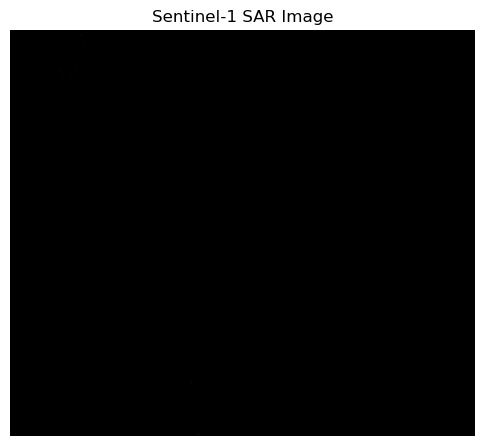

In [1]:
import sys
import os
import openeo
sys.path.append(os.path.abspath(".."))
from scripts.download_SAR_image import run_download
from scripts.get_unique_path import get_unique_path

# Connect and authenticate to Copernicus Data Space openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

coordinates =  [ [48.325487506118264, 28.742803969343313],
            [48.325487506118264, 28.414218984218607],
            [48.75387693420447, 28.414218984218607],
            [48.75387693420447, 28.742803969343313],
            [48.325487506118264, 28.742803969343313],
        ]

temporal_extent= ["2017-08-09", "2017-08-12"]

outputfile = "../outputs/1_Sentinel1_from_openEO.tif"

unique_output_path = get_unique_path(outputfile)

# 1. Download Sentinel-1 data
downloaded_file = run_download(coordinates, temporal_extent, unique_output_path, connection)


✅ EO API image converted to dB and saved as ../outputs/2_Sentinel1_converted_dB_4.tif


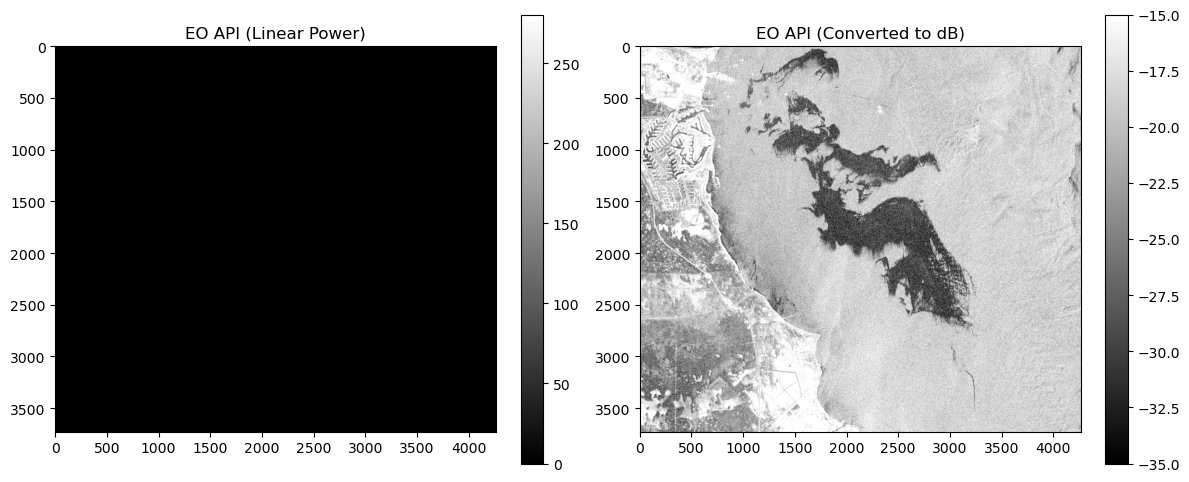

In [2]:
# Add the project root (parent of "scripts") to sys.path
sys.path.append(os.path.abspath(".."))
from scripts.eoapi_preprocessor import EOAPIPreprocessor

preprocessed_output_file_path = "../outputs/2_Sentinel1_converted_dB.tif"  # output
unique_preprocessed_output_path = get_unique_path(preprocessed_output_file_path)

# Initialize preprocessor
preprocessor = EOAPIPreprocessor(unique_output_path, unique_preprocessed_output_path)

# Convert EO API image to dB
preprocessor.convert_to_db()

# Visualize before and after
preprocessor.visualize_conversion()



✅ Saved segmented mask to: ../outputs\georeferenced_segmentation_mask_4.tif
✅ Saved polygons to: ../outputs\georreferenced_segmentation.geojson


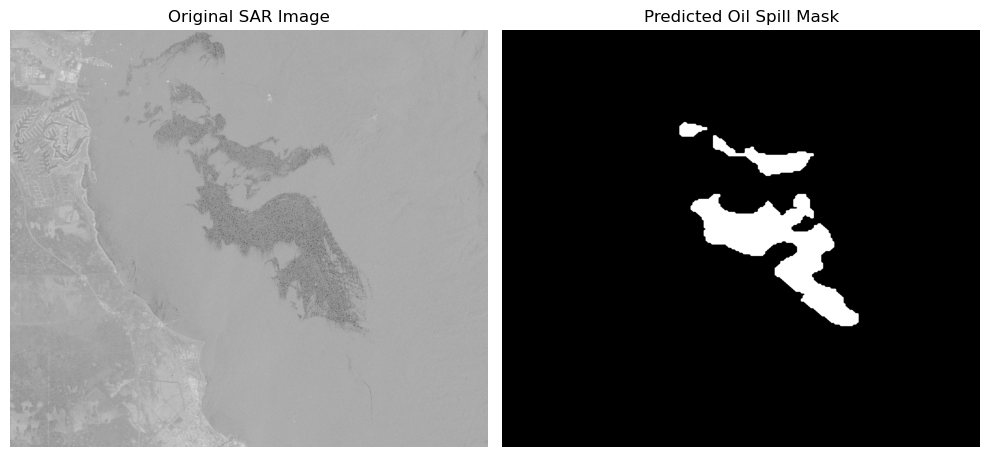

In [4]:
from scripts.inference import run_inference
# 3. Run inference

# in case of changing something in inference code, 
# it's possible to run the above code to update the source without need of restart the kernel:

# %run -i "C:/Users/Bruna/Documents/repos/oil_spill_segmentation/scripts/inference.py"

# choose the model
model_name = "deeplabv3"   # options: "deeplabv3", "fpn", "pan"
results = run_inference(unique_preprocessed_output_path, model_name, "../outputs")